In [2]:
import time
import pandas as pd
import numpy as np

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split


data = pd.read_csv('version4_district+neighborhood.csv',encoding="utf-8")

#preu_park_noinclos
#preu_park_noinclos=((data['hasParkingSpace']!=data['isParkingSpaceIncludedInPrice']).astype(float))
#data=pd.concat((data,preu_park_noinclos),axis=1)
#data.drop("isParkingSpaceIncludedInPrice",axis=1)

data.columns

Index([u'rooms', u'bathrooms', u'exterior', u'hasLift', u'size', u'floor',
       u'longitude', u'latitude', u'price', u'hasParkingSpace',
       u'isParkingSpaceIncludedInPrice', u'priceperarea', u'type_chalet',
       u'type_chalet_independantHouse', u'type_chalet_semidetachedHouse',
       u'type_chalet_terracedHouse', u'type_flat', u'type_flat_duplex',
       u'type_flat_penthouse', u'type_flat_studio', u'good', u'newdevelopment',
       u'renew', u'Ciutat Vella', u'Eixample', u'Gràcia', u'Horta Guinardó',
       u'Les Corts', u'Nou Barris', u'Sant Andreu', u'Sant Martí',
       u'Sants-Montjuïc', u'Sarrià-Sant Gervasi', u'Baró de Viver',
       u'Can Baró', u'Can Peguera - El Turó de la Peira',
       u'Ciutat Meridiana - Torre Baró - Vallbona',
       u'Diagonal Mar i el Front Marítim del Poblenou', u'El Baix Guinardó',
       u'El Besòs', u'El Bon Pastor', u'El Camp d'En Grassot i Gràcia Nova',
       u'El Camp de l'Arpa del Clot', u'El Carmel', u'El Clot', u'El Coll',
       u'

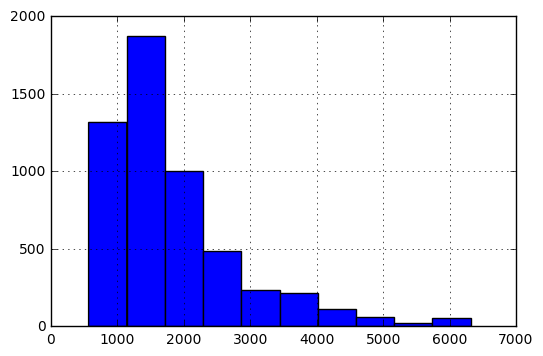

In [3]:
%matplotlib inline
data['price'].hist()

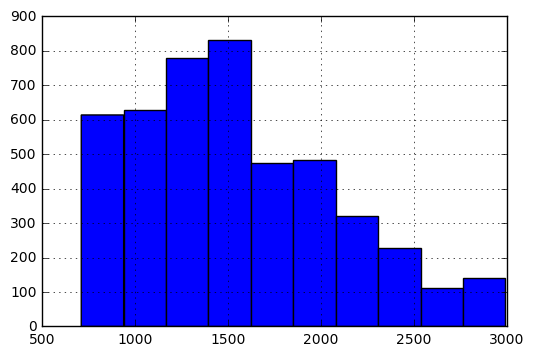

In [4]:
#Remove outliers


per=np.percentile(np.array(data['price']), [2.5, 89])
data=data[data['price']>per[0]]
data=data[data['price']<per[1]]

data['price'].hist()

In [5]:
y =data['price']
X = data.drop(['price'], axis=1)
X=np.array(X)
y=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [6]:
#Linear regression

# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'normalize' : [True,False]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(LinearRegression(fit_intercept=True), tuned_parameters, cv=10, scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."



Best parameters set found on training set:

{'normalize': False}

Mean Absolute Error:

334.945689306

The model is trained on the training set. The scores are computed on the testing set.


In [7]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [200, 500, 600, 750], 'max_features': ["auto", "sqrt", "log2"]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))


Best parameters set found on training set:

{'max_features': 'sqrt', 'n_estimators': 750, 'bootstrap': False}

Mean Absolute Error:

240.717511015

The model is trained on the training set. The scores are computed on the testing set.
--- 619.898279905 seconds ---


In [ ]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [650, 700, 750, 800, 850], 'max_features': ["auto", "sqrt", "log2"]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))

In [8]:
#score with best parameters

from sklearn.model_selection import cross_val_score
clf = RandomForestRegressor(n_estimators=750, max_features='sqrt', bootstrap=False, random_state=44, n_jobs=-1)
scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [9]:
scores=np.abs(scores)
print scores
print np.mean(scores)
print np.std(scores)

[ 196.87614959  245.45418711  234.64348485  224.78505532  254.63469414
  240.18060014  218.21831285  275.33158978  260.73491926  212.58443914]
236.344343218
22.6593976903


In [13]:
#ExtraTreesClassifier feature selection

print X.shape

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel

clf = RandomForestRegressor(n_estimators=750, max_features='sqrt', bootstrap=False, random_state=44, n_jobs=-1)
clf = clf.fit(X, y)
print clf.feature_importances_

m=np.mean(clf.feature_importances_)
print m*0.1
model = SelectFromModel(clf, threshold=m*0.1, prefit=True)

#model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X)
print X_new.shape
print data.columns

(4614, 98)
[  7.20866648e-02   1.09983510e-01   1.31515142e-02   1.99384559e-02
   2.27693240e-01   6.06205344e-02   1.08900999e-01   1.28171713e-01
   1.17725038e-02   9.58346821e-03   7.05650241e-02   1.65209024e-04
   1.10291081e-03   3.21170031e-04   4.61104455e-04   8.34719917e-03
   5.09701844e-03   5.58837449e-03   5.16273522e-03   1.87591726e-02
   9.16076778e-05   1.14123105e-03   6.38351837e-03   7.43382418e-03
   2.78506194e-03   6.28509102e-03   1.71011313e-03   1.76117654e-03
   1.52167434e-03   2.84781658e-03   3.38333295e-03   1.04889997e-02
   0.00000000e+00   3.75490348e-04   8.88677526e-05   2.46504167e-05
   1.53810195e-03   5.32088591e-04   2.33513331e-04   1.53684267e-05
   1.22880812e-03   1.35984530e-03   8.96876088e-05   4.30851259e-04
   2.18274691e-04   3.23814237e-04   2.16581167e-03   1.22305261e-03
   4.01948119e-03   9.79937726e-04   1.29270970e-03   1.18641924e-03
   2.36289750e-03   3.78443633e-03   4.87904380e-04   4.99682307e-04
   2.18170194e-03   2.2

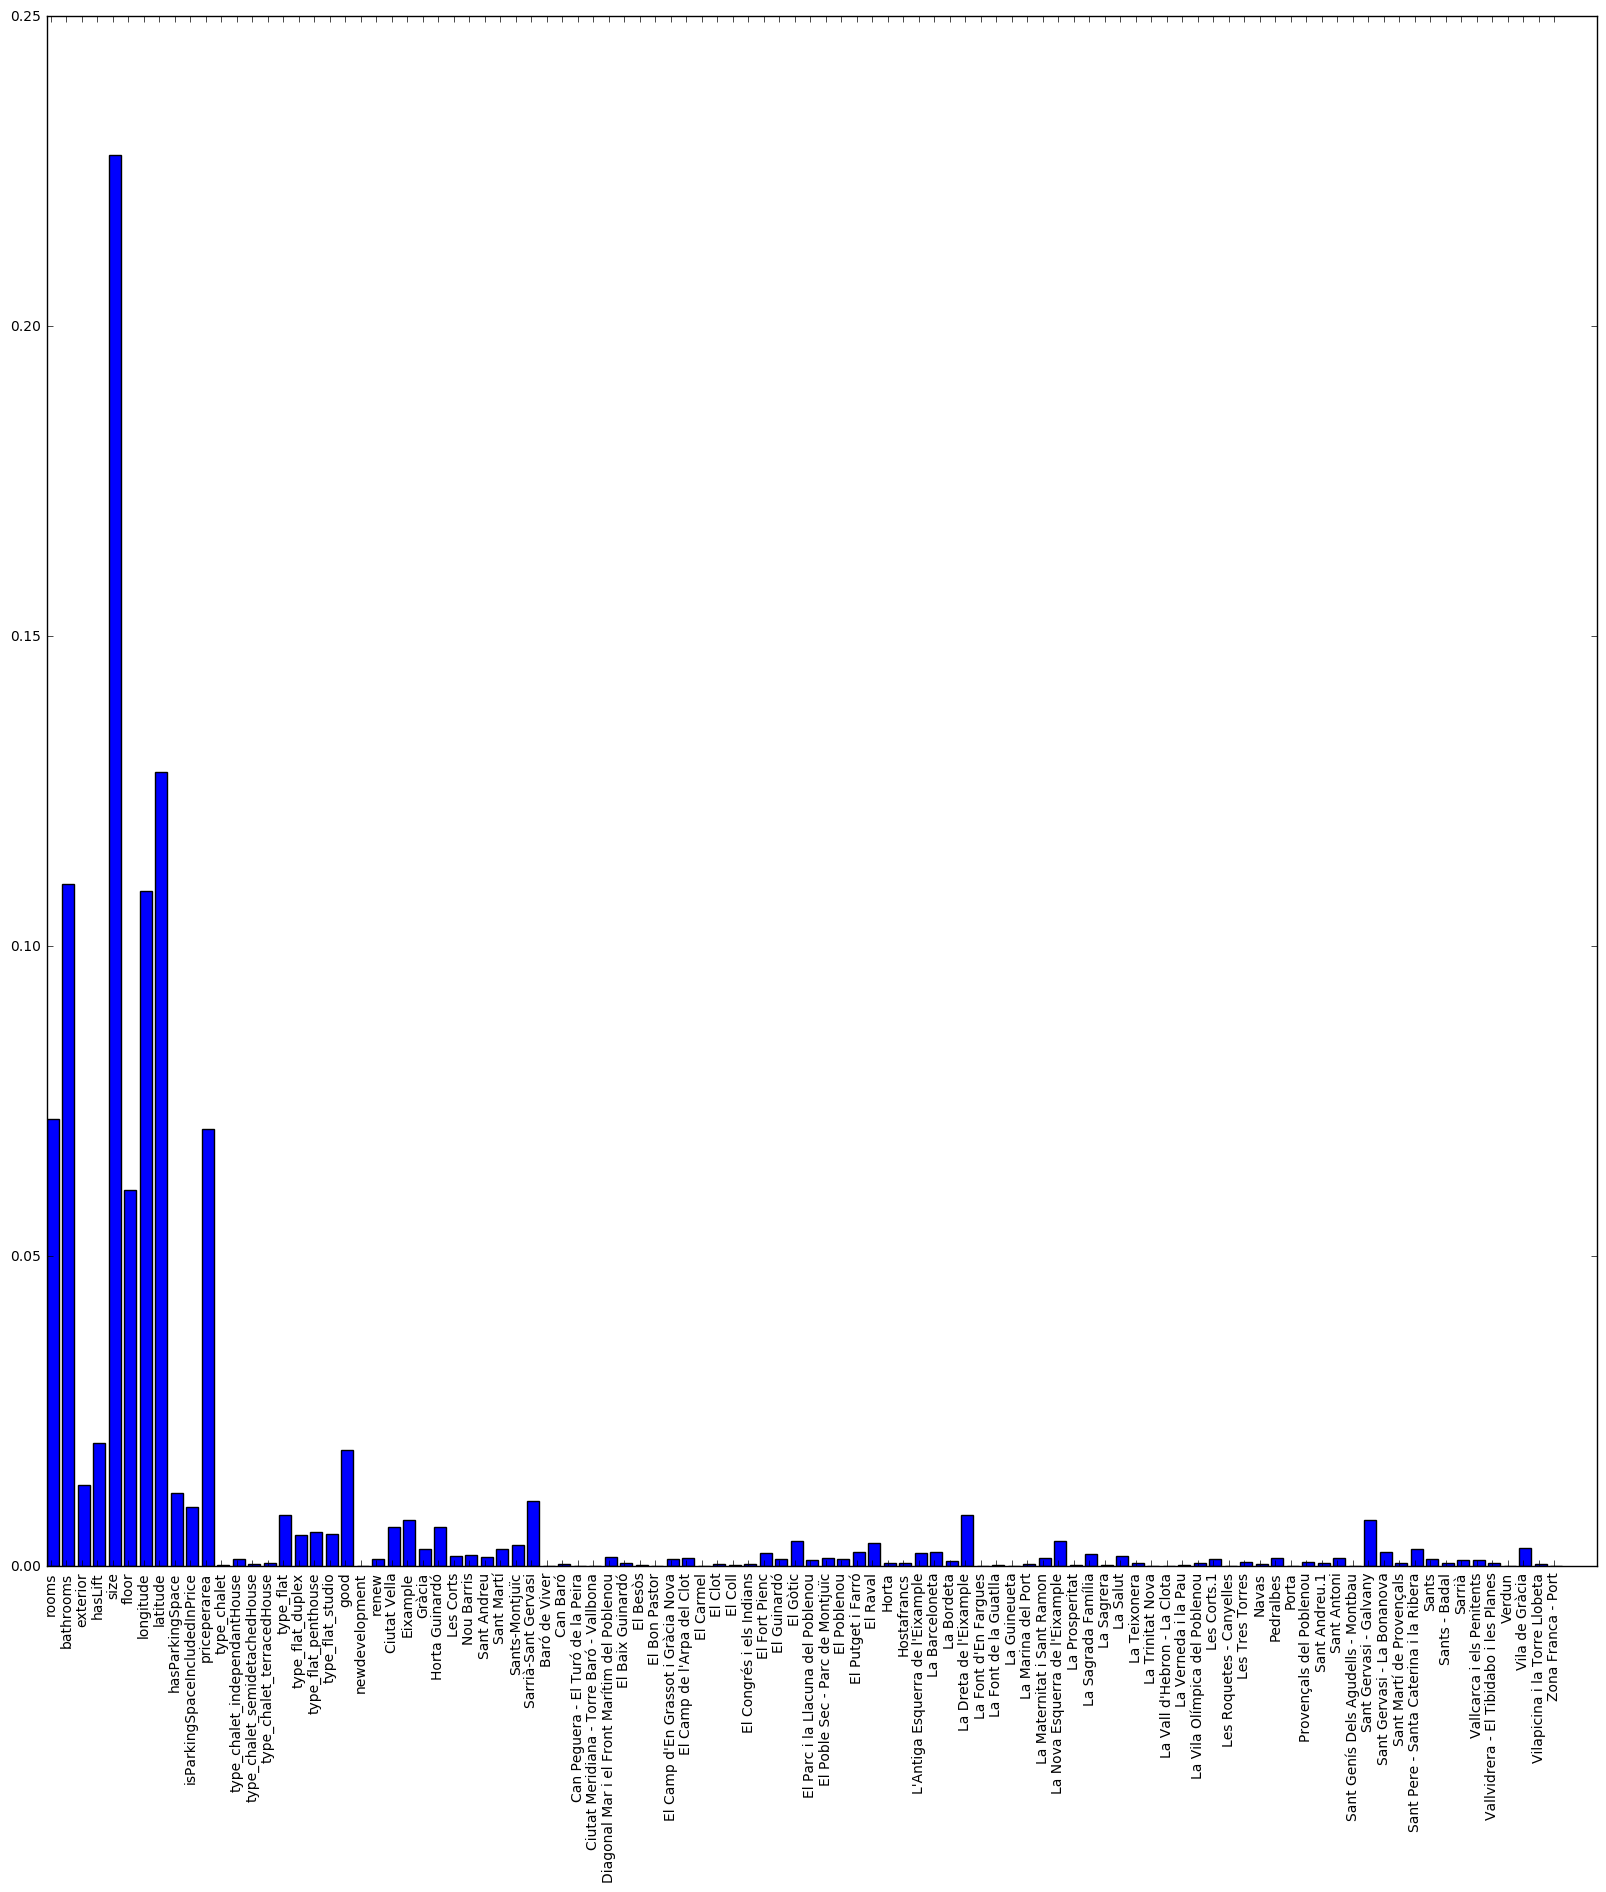

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
ind = np.arange(X.shape[1]) 
plt.bar(ind, clf.feature_importances_)
width = 0.55 
plt.xticks(ind + width/2., (u'rooms', u'bathrooms', u'exterior', u'hasLift', u'size', u'floor',
       u'longitude', u'latitude', u'hasParkingSpace',
       u'isParkingSpaceIncludedInPrice', u'priceperarea', u'type_chalet',
       u'type_chalet_independantHouse', u'type_chalet_semidetachedHouse',
       u'type_chalet_terracedHouse', u'type_flat', u'type_flat_duplex',
       u'type_flat_penthouse', u'type_flat_studio', u'good', u'newdevelopment',
       u'renew', u'Ciutat Vella', u'Eixample', u'Gràcia', u'Horta Guinardó',
       u'Les Corts', u'Nou Barris', u'Sant Andreu', u'Sant Martí',
       u'Sants-Montjuïc', u'Sarrià-Sant Gervasi', u'Baró de Viver',
       u'Can Baró', u'Can Peguera - El Turó de la Peira',
       u'Ciutat Meridiana - Torre Baró - Vallbona',
       u'Diagonal Mar i el Front Marítim del Poblenou', u'El Baix Guinardó',
       u'El Besòs', u'El Bon Pastor', u'El Camp d\'En Grassot i Gràcia Nova',
       u'El Camp de l\'Arpa del Clot', u'El Carmel', u'El Clot', u'El Coll',
       u'El Congrés i els Indians', u'El Fort Pienc', u'El Guinardó',
       u'El Gòtic', u'El Parc i la Llacuna del Poblenou',
       u'El Poble Sec - Parc de Montjuïc', u'El Poblenou',
       u'El Putget i Farró', u'El Raval', u'Horta', u'Hostafrancs',
       u'L\'Antiga Esquerra de l\'Eixample', u'La Barceloneta', u'La Bordeta',
       u'La Dreta de l\'Eixample', u'La Font d\'En Fargues',
       u'La Font de la Guatlla', u'La Guineueta', u'La Marina del Port',
       u'La Maternitat i Sant Ramon', u'La Nova Esquerra de l\'Eixample',
       u'La Prosperitat', u'La Sagrada Família', u'La Sagrera', u'La Salut',
       u'La Teixonera', u'La Trinitat Nova', u'La Vall d\'Hebron - La Clota',
       u'La Verneda i la Pau', u'La Vila Olímpica del Poblenou',
       u'Les Corts.1', u'Les Roquetes - Canyelles', u'Les Tres Torres',
       u'Navas', u'Pedralbes', u'Porta', u'Provençals del Poblenou',
       u'Sant Andreu.1', u'Sant Antoni', u'Sant Genís Dels Agudells - Montbau',
       u'Sant Gervasi - Galvany', u'Sant Gervasi - La Bonanova',
       u'Sant Martí de Provençals', u'Sant Pere - Santa Caterina i la Ribera',
       u'Sants', u'Sants - Badal', u'Sarrià', u'Vallcarca i els Penitents',
       u'Vallvidrera - El Tibidabo i les Planes', u'Verdun', u'Vila de Gràcia',
       u'Vilapicina i la Torre Llobeta', u'Zona Franca - Port'), rotation='vertical')
plt.show()

# Gradient Boosting Regressor (no ejecutado)

In [10]:
#scaled

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

#Tenemos que normalizar y??????

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
#Gradient Boosting Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators':[100, 200, 500, 600, 750], 
                     'learning_rate':[0.1,0.2,0.3,0.5],'max_depth':[1,2,3,4,5], 
                     'loss':['ls', 'lad', 'huber', 'quantile'], 'max_features':["auto", "sqrt", "log2"]}]

clf = GridSearchCV(GradientBoostingRegressor(criterion='friedman_mse', random_state=44), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 215 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1815 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2465 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 3215 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4065 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 5015 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 6065 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 7215 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 8465 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 9815 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 11265 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed: 

Best parameters set found on training set:

{'max_features': 'sqrt', 'loss': 'huber', 'learning_rate': 0.1, 'n_estimators': 750, 'max_depth': 5}

Mean Absolute Error:

251.233762088

The model is trained on the training set. The scores are computed on the testing set.
--- 2665.17582607 seconds ---


In [23]:
#score with best parameters

from sklearn.model_selection import cross_val_score
clf = GradientBoostingRegressor(n_estimators=750,learning_rate=0.1, max_depth=5, loss='huber',
                                max_features='sqrt', random_state=44)
scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [24]:
scores=np.abs(scores)
print scores
print np.mean(scores)
print np.std(scores)

[ 206.31053341  272.56325731  268.83152568  244.48669136  272.06948688
  267.0919594   244.14311458  298.34532781  287.67843379  240.45890692]
260.197923714
25.3463695763


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
#Gradient Boosting Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators':[700, 750, 800, 850], 
                     'learning_rate':[0.1,0.2,0.3],'max_depth':[4,5,6,7,9,11], 
                     'loss':['ls', 'lad', 'huber'], 'max_features':["auto", "sqrt", "log2"]}]

clf = GridSearchCV(GradientBoostingRegressor(criterion='friedman_mse', random_state=44), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 52.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 79.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 123.9min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 143.2min finished


Best parameters set found on training set:

{'max_features': 'log2', 'loss': 'lad', 'learning_rate': 0.1, 'n_estimators': 750, 'max_depth': 11}

Mean Absolute Error:

252.178816469

The model is trained on the training set. The scores are computed on the testing set.
--- 8596.99742603 seconds ---


In [26]:
#score with best parameters

from sklearn.model_selection import cross_val_score
clf = GradientBoostingRegressor(n_estimators=750,learning_rate=0.1, max_depth=11, loss='lad',
                                max_features='log2', random_state=44)
scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [27]:
scores=np.abs(scores)
print scores
print np.mean(scores)
print np.std(scores)

[ 211.00114155  260.50452065  264.65932486  240.94345072  277.17581778
  275.67717264  232.83151344  304.45158772  289.33842983  222.40172925]
257.898468844
28.7594609074
